## Aufgabe 3: Einfaches Sensordatenhandling (zwei Inertialsensoren)
### Teil 1: Datenimport

Die Textdatei `imu_data` enthält Sensormessungen nach folgendem Format: `<Zeitstempel in Sekunden> <LAccelerometer_x> <LAccelerometer_y> <LAccelerometer_z> <LGyroskop_x> <LGyroskop_y> <LGyroskop_z> <LMagnetometer_x> <LMagnetometer_y> <LMagnetometer_z> <RAccelerometer_x> <RAccelerometer_y> <RAccelerometer_z> <RGyroskop_x> <RGyroskop_y> <RGyroskop_z> <RMagnetometer_x> <RMagnetometer_y> <RMagnetometer_z>`. `L` steht dabei für den linken Fuß, `R` für den rechten. Dies meint die Körperstelle, an der der jeweilige Sensor angebracht war. Schaue dir den Dateiinhalt gerne einmal in einem Editor an.

Lies die Datei in eine geeignete Datenstruktur ein (z.B. eine verschachtelte Liste oder ein NumPy Array). Gib zur Überprüfung die Daten zum ersten Zeitpunkt sowie die Anzahl der Zeitpunkte und Messdaten pro Zeitpunkt aus.

**Anmerkungen:** Die Person ist während der Datenaufnahme gegangen. Accelerometer messen Linearbeschleunigungen, Gyroskope messen Winkelgeschwindigkeiten, Magnetometer messen Magnetfelder.

In [6]:
# Variante 1: Einlesen der Daten aus einer Datei in eine verschachtelte Liste
data_list = []
with open("imu_data", 'r') as file:
    for line in file:
        # Entferne führende und nachfolgende Leerzeichen und teile die Zeile in Zahlen auf
        numbers = line.strip().split(" ")
        # Konvertiere die Zeichenketten in Fließkommazahlen
        numbers = [float(num) for num in numbers]
        # Füge die Liste der Zahlen zur verschachtelten Liste hinzu
        data_list.append(numbers)

# Überprüfen der eingelesenen Daten
print("Daten zum ersten Zeitpunkt:")
print(data_list[0])  # Erster Eintrag der verschachtelten Liste
print(f"Anzahl der Messdaten: {len(data_list)}, Messdaten pro Zeitpunkt: {len(data_list[0])}")

Daten zum ersten Zeitpunkt:
[0.0, 5.22969, -4.72085, 7.03979, 0.01433, 0.02267, 0.01997, -0.78931, 0.57031, -0.38159, -3.41607, -5.00091, 7.69099, 0.00087, 0.00355, 0.00252, -0.04688, 0.36987, -0.94116]
Anzahl der Messdaten: 21999, Messdaten pro Zeitpunkt: 19


In [8]:
# Variante 2: Einlesen der Daten mittels NumPy
import numpy as np

# Einlesen der Daten
data_array = np.loadtxt("imu_data") # Da die Daten durch Leerzeichen getrennt sind, passt der Standard-Delimiter ' '

# Überprüfen der eingelesenen Daten
print("Daten zum ersten Zeitpunkt:")
print(data_array[0,:])
print(f"Anzahl der Messdaten: {data_array.shape[0]}, Messdaten pro Zeitpunkt: {data_array.shape[1]}")

Daten zum ersten Zeitpunkt:
[ 0.00000e+00  5.22969e+00 -4.72085e+00  7.03979e+00  1.43300e-02
  2.26700e-02  1.99700e-02 -7.89310e-01  5.70310e-01 -3.81590e-01
 -3.41607e+00 -5.00091e+00  7.69099e+00  8.70000e-04  3.55000e-03
  2.52000e-03 -4.68800e-02  3.69870e-01 -9.41160e-01]
Anzahl der Messdaten: 21999, Messdaten pro Zeitpunkt: 19


### Teil 2: Datenausfälle prüfen
Die Daten wurden mit 60 Hz erhoben. Prüfe quantitativ und qualitativ, ob es Datenausfälle gab und ob die Zeitstempel wie aufgrund der Aufnahmefrequenz erwartet sind.

**Hinweise:** Zur quantitativen Prüfung kannst du dir Minimum, Maximum und Mittelwert der Differenzen der Zeitstempel anschauen (jeweils Differenz aktueller Sample zum Vorgänger-Sample). Zur qualitativen Prüfung kannst du die Differenzen plotten.

Expected difference: 0.01667, max sample diff: 0.02000, mean sample diff: 0.01667, min sample diff: 0.01300


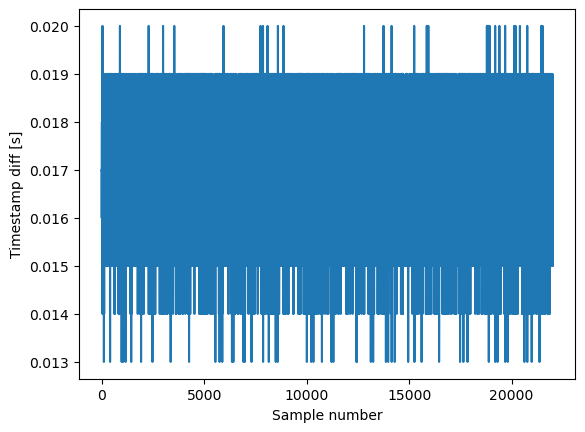

In [12]:
# Variante 1: Verwendung der verschachtelten Liste
from matplotlib import pyplot as plt

# Extrahiere die Zeitstempel (erstes Element jeder "inneren" Liste) aus der verschachtelten Liste
timestamps = [row[0] for row in data_list]

# Berechne die Differenzen der ersten Spalte
diffs = [timestamps[i+1] - timestamps[i] for i in range(len(timestamps) - 1)]

max_diff = max(diffs)
min_diff = min(diffs)
mean_diff = sum(diffs) / len(diffs)

print(f"Expected difference: {1/60:.5f}, max sample diff: {max_diff:.5f}, mean sample diff: {mean_diff:.5f}, min sample diff: {min_diff:.5f}")

# Plot der Differenzen
plt.plot(diffs)
plt.xlabel("Sample number")
plt.ylabel("Timestamp diff [s]")
plt.show()

Expected difference: 0.01667, max sample diff: 0.02000, mean sample diff: 0.01667, min sample diff: 0.01300


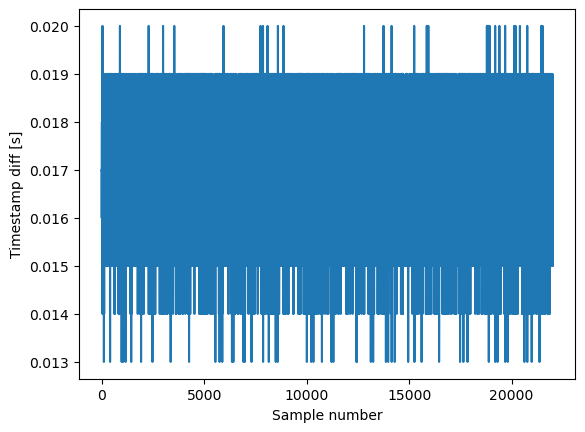

In [14]:
# Variante 2: Verwendung von NumPy
from matplotlib import pyplot

diffs = np.diff(data_array[:,0])
max_diff = np.max(diffs)
min_diff = np.min(diffs)
mean_diff = np.mean(diffs)
print(f"Expected difference: {1/60:.5f}, max sample diff: {max_diff:.5f}, mean sample diff: {mean_diff:.5f}, min sample diff: {min_diff:.5f}")

pyplot.plot(diffs)
plt.xlabel("Sample number")
plt.ylabel("Timestamp diff [s]")
pyplot.show()